In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv("credit_card_clustering.csv")

In [44]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [45]:
data.shape

(8950, 18)

In [46]:
data['CUST_ID'].nunique()

8950

In [47]:
data['BALANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
10%         23.575529
20%         77.238026
30%        207.176552
40%        467.021989
50%        873.385231
60%       1207.815587
70%       1698.588855
80%       2571.434263
90%       4338.563657
max      19043.138560
Name: BALANCE, dtype: float64

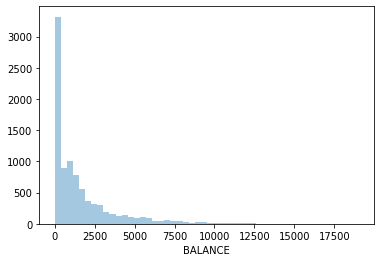

In [48]:
sns.distplot(data['BALANCE'], kde=False)

In [99]:
data['PURCHASES'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
10%          0.000000
20%          0.000000
30%         89.285000
40%        212.850000
50%        361.280000
60%        557.546000
70%        894.316000
80%       1422.438000
90%       2542.624000
max      49039.570000
Name: PURCHASES, dtype: float64

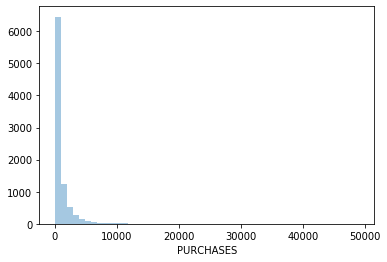

In [100]:
 sns.distplot(data['PURCHASES'], kde=False)

In [87]:
data['PRC_FULL_PAYMENT'].describe(np.arange(0.1, 1, 0.1))

count    8950.000000
mean        0.153715
std         0.292499
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.083333
80%         0.250000
90%         0.670000
max         1.000000
Name: PRC_FULL_PAYMENT, dtype: float64

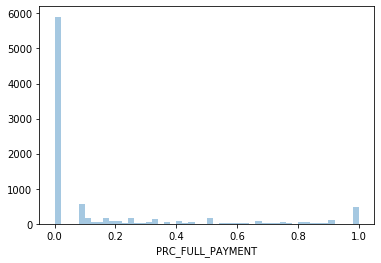

In [88]:
sns.distplot(data['PRC_FULL_PAYMENT'], kde=False)

In [0]:
from sklearn.cluster import KMeans

In [101]:
# Get features we need
features = ['BALANCE', 'PURCHASES', 'PRC_FULL_PAYMENT']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,BALANCE,PURCHASES,PRC_FULL_PAYMENT
0,40.900749,95.40,0.000000
1,3202.467416,0.00,0.222222
2,2495.148862,773.17,0.000000
3,1666.670542,1499.00,0.000000
4,817.714335,16.00,0.000000


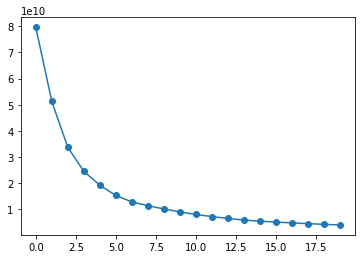

In [102]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

In [0]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters=5, random_state=42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [104]:
new_data.head()

,BALANCE,PURCHASES,PRC_FULL_PAYMENT,labels
0,40.900749,95.40,0.000000,0
1,3202.467416,0.00,0.222222,3
2,2495.148862,773.17,0.000000,3
3,1666.670542,1499.00,0.000000,0
4,817.714335,16.00,0.000000,0


In [105]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

#Description from mean: low balance, low purchase, high percent of full payment - NEWBIES

,BALANCE,PURCHASES,PRC_FULL_PAYMENT,labels
count,6077.000000,6077.000000,6077.000000,6077.0
mean,531.174959,605.741848,0.194756,0.0
std,535.029390,731.863047,0.316201,0.0
min,0.000000,0.000000,0.000000,0.0
25%,55.681483,61.710000,0.000000,0.0
50%,299.531528,332.740000,0.000000,0.0
75%,987.102704,863.970000,0.250000,0.0
max,1765.502751,3520.000000,1.000000,0.0


In [106]:
# Cluster 1
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

#Description from mean: mid balance, high purchase, high percent of full payment - FEELING BIG TIME 

,BALANCE,PURCHASES,PRC_FULL_PAYMENT,labels
count,24.000000,24.000000,24.000000,24.0
mean,5390.389571,27690.865833,0.493845,1.0
std,4322.133830,8068.491163,0.418675,0.0
min,1268.809031,17409.210000,0.000000,1.0
25%,2741.523040,22078.815000,0.083333,1.0
50%,3422.898250,26008.730000,0.458333,1.0
75%,6817.133432,31609.457500,0.937500,1.0
max,19043.138560,49039.570000,1.000000,1.0


In [107]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

#Description high balance, low purchase, low percent full payment - TITO MONG KURIPOT

,BALANCE,PURCHASES,PRC_FULL_PAYMENT,labels
count,593.000000,593.000000,593.000000,593.0
mean,7337.439619,1140.272681,0.006666,2.0
std,2150.848707,1659.624850,0.027627,0.0
min,4925.502001,0.000000,0.000000,2.0
25%,5805.320790,0.000000,0.000000,2.0
50%,6758.987905,362.360000,0.000000,2.0
75%,8099.879299,1627.690000,0.000000,2.0
max,18495.558550,9792.230000,0.250000,2.0


In [108]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

#Description mid balance, low purchase, low percent full payment - SWIPER NOT SWIPING

,BALANCE,PURCHASES,PRC_FULL_PAYMENT,labels
count,1754.000000,1754.000000,1754.000000,1754.0
mean,2989.045398,586.873330,0.011377,3.0
std,943.685672,790.127679,0.040083,0.0
min,1756.206467,0.000000,0.000000,3.0
25%,2198.364660,0.000000,0.000000,3.0
50%,2756.202231,206.000000,0.000000,3.0
75%,3669.548515,932.622500,0.000000,3.0
max,5271.415483,3525.370000,0.500000,3.0


In [110]:
# Cluster 4
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()

#Description mid balance, mid purchase, high percent payment - AVERAGE JOE 

,BALANCE,PURCHASES,PRC_FULL_PAYMENT,labels
count,502.000000,502.000000,502.000000,502.0
mean,2093.312373,5831.577191,0.311656,4.0
std,1999.267229,2568.561455,0.391906,0.0
min,12.659909,3145.790000,0.000000,4.0
25%,592.429408,3978.860000,0.000000,4.0
50%,1475.193756,4916.540000,0.083333,4.0
75%,2982.717022,6796.680000,0.741071,4.0
max,11642.601560,15704.040000,1.000000,4.0
